In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

In [2]:
tr=pd.read_csv("Training.csv")
te=pd.read_csv("Testing.csv")
tr.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,prognosis
0,1,1,1,1,1,0,1,1,1,1,positive
1,1,1,1,1,1,0,1,1,1,1,positive
2,1,1,1,1,1,0,1,1,1,1,positive
3,1,1,1,1,1,0,1,1,1,1,positive
4,1,1,1,1,1,0,1,1,1,1,positive


In [3]:
te.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,prognosis
0,1,1,1,1,1,0,1,1,1,1,positive
1,1,1,1,1,1,0,1,1,1,1,positive
2,1,1,1,1,1,0,1,1,1,1,positive
3,1,1,1,1,1,0,1,1,1,1,positive
4,1,1,1,1,1,0,1,1,1,1,positive


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12110 entries, 0 to 12109
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fever                    12110 non-null  int64 
 1   Tiredness                12110 non-null  int64 
 2   Dry-Cough                12110 non-null  int64 
 3   Difficulty-in-Breathing  12110 non-null  int64 
 4   Sore-Throat              12110 non-null  int64 
 5   None_Sympton             12110 non-null  int64 
 6   Pains                    12110 non-null  int64 
 7   Nasal-Congestion         12110 non-null  int64 
 8   Runny-Nose               12110 non-null  int64 
 9   Diarrhea                 12110 non-null  int64 
 10  prognosis                12110 non-null  object
dtypes: int64(10), object(1)
memory usage: 1.0+ MB


In [5]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fever                    622 non-null    int64 
 1   Tiredness                622 non-null    int64 
 2   Dry-Cough                622 non-null    int64 
 3   Difficulty-in-Breathing  622 non-null    int64 
 4   Sore-Throat              622 non-null    int64 
 5   None_Sympton             622 non-null    int64 
 6   Pains                    622 non-null    int64 
 7   Nasal-Congestion         622 non-null    int64 
 8   Runny-Nose               622 non-null    int64 
 9   Diarrhea                 622 non-null    int64 
 10  prognosis                622 non-null    object
dtypes: int64(10), object(1)
memory usage: 53.6+ KB


In [6]:
tr=pd.concat([tr,te])
tr.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,prognosis
0,1,1,1,1,1,0,1,1,1,1,positive
1,1,1,1,1,1,0,1,1,1,1,positive
2,1,1,1,1,1,0,1,1,1,1,positive
3,1,1,1,1,1,0,1,1,1,1,positive
4,1,1,1,1,1,0,1,1,1,1,positive


In [7]:
tr.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea
count,12732.000000,12732.000000,12732.000000,12732.000000,12732.000000,12732.000000,12732.000000,12732.000000,12732.000000,12732.000000
mean,0.359881,0.539114,0.588281,0.497644,0.300660,0.051838,0.365693,0.548539,0.546654,0.363651
std,0.479984,0.498487,0.492164,0.500014,0.458563,0.221708,0.481643,0.497658,0.497838,0.481069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def fnc(word):
    if word=="positive":
        return 1
    elif word=="negative":
        return 0
tr["prognosis"]=tr["prognosis"].apply(fnc)
tr.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,prognosis
0,1,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,1,0,1,1,1,1,1
2,1,1,1,1,1,0,1,1,1,1,1
3,1,1,1,1,1,0,1,1,1,1,1
4,1,1,1,1,1,0,1,1,1,1,1


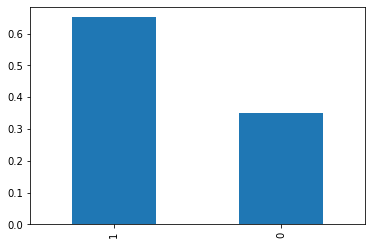

In [9]:
tr["prognosis"].value_counts(normalize=True).plot(kind="bar")
plt.show()

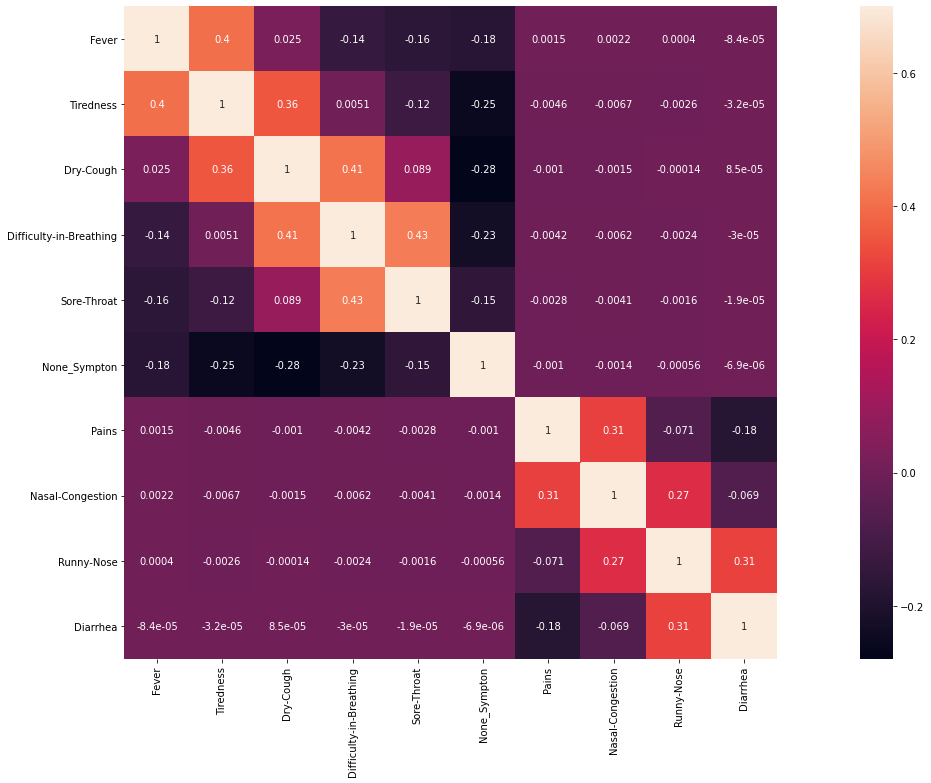

In [10]:
plt.figure(figsize=(30,12))
sns.heatmap(tr.drop("prognosis",axis=1).corr(),vmax=0.7,square=True,annot=True)
plt.show()

In [11]:
tr["prognosis"].isnull().sum()

0

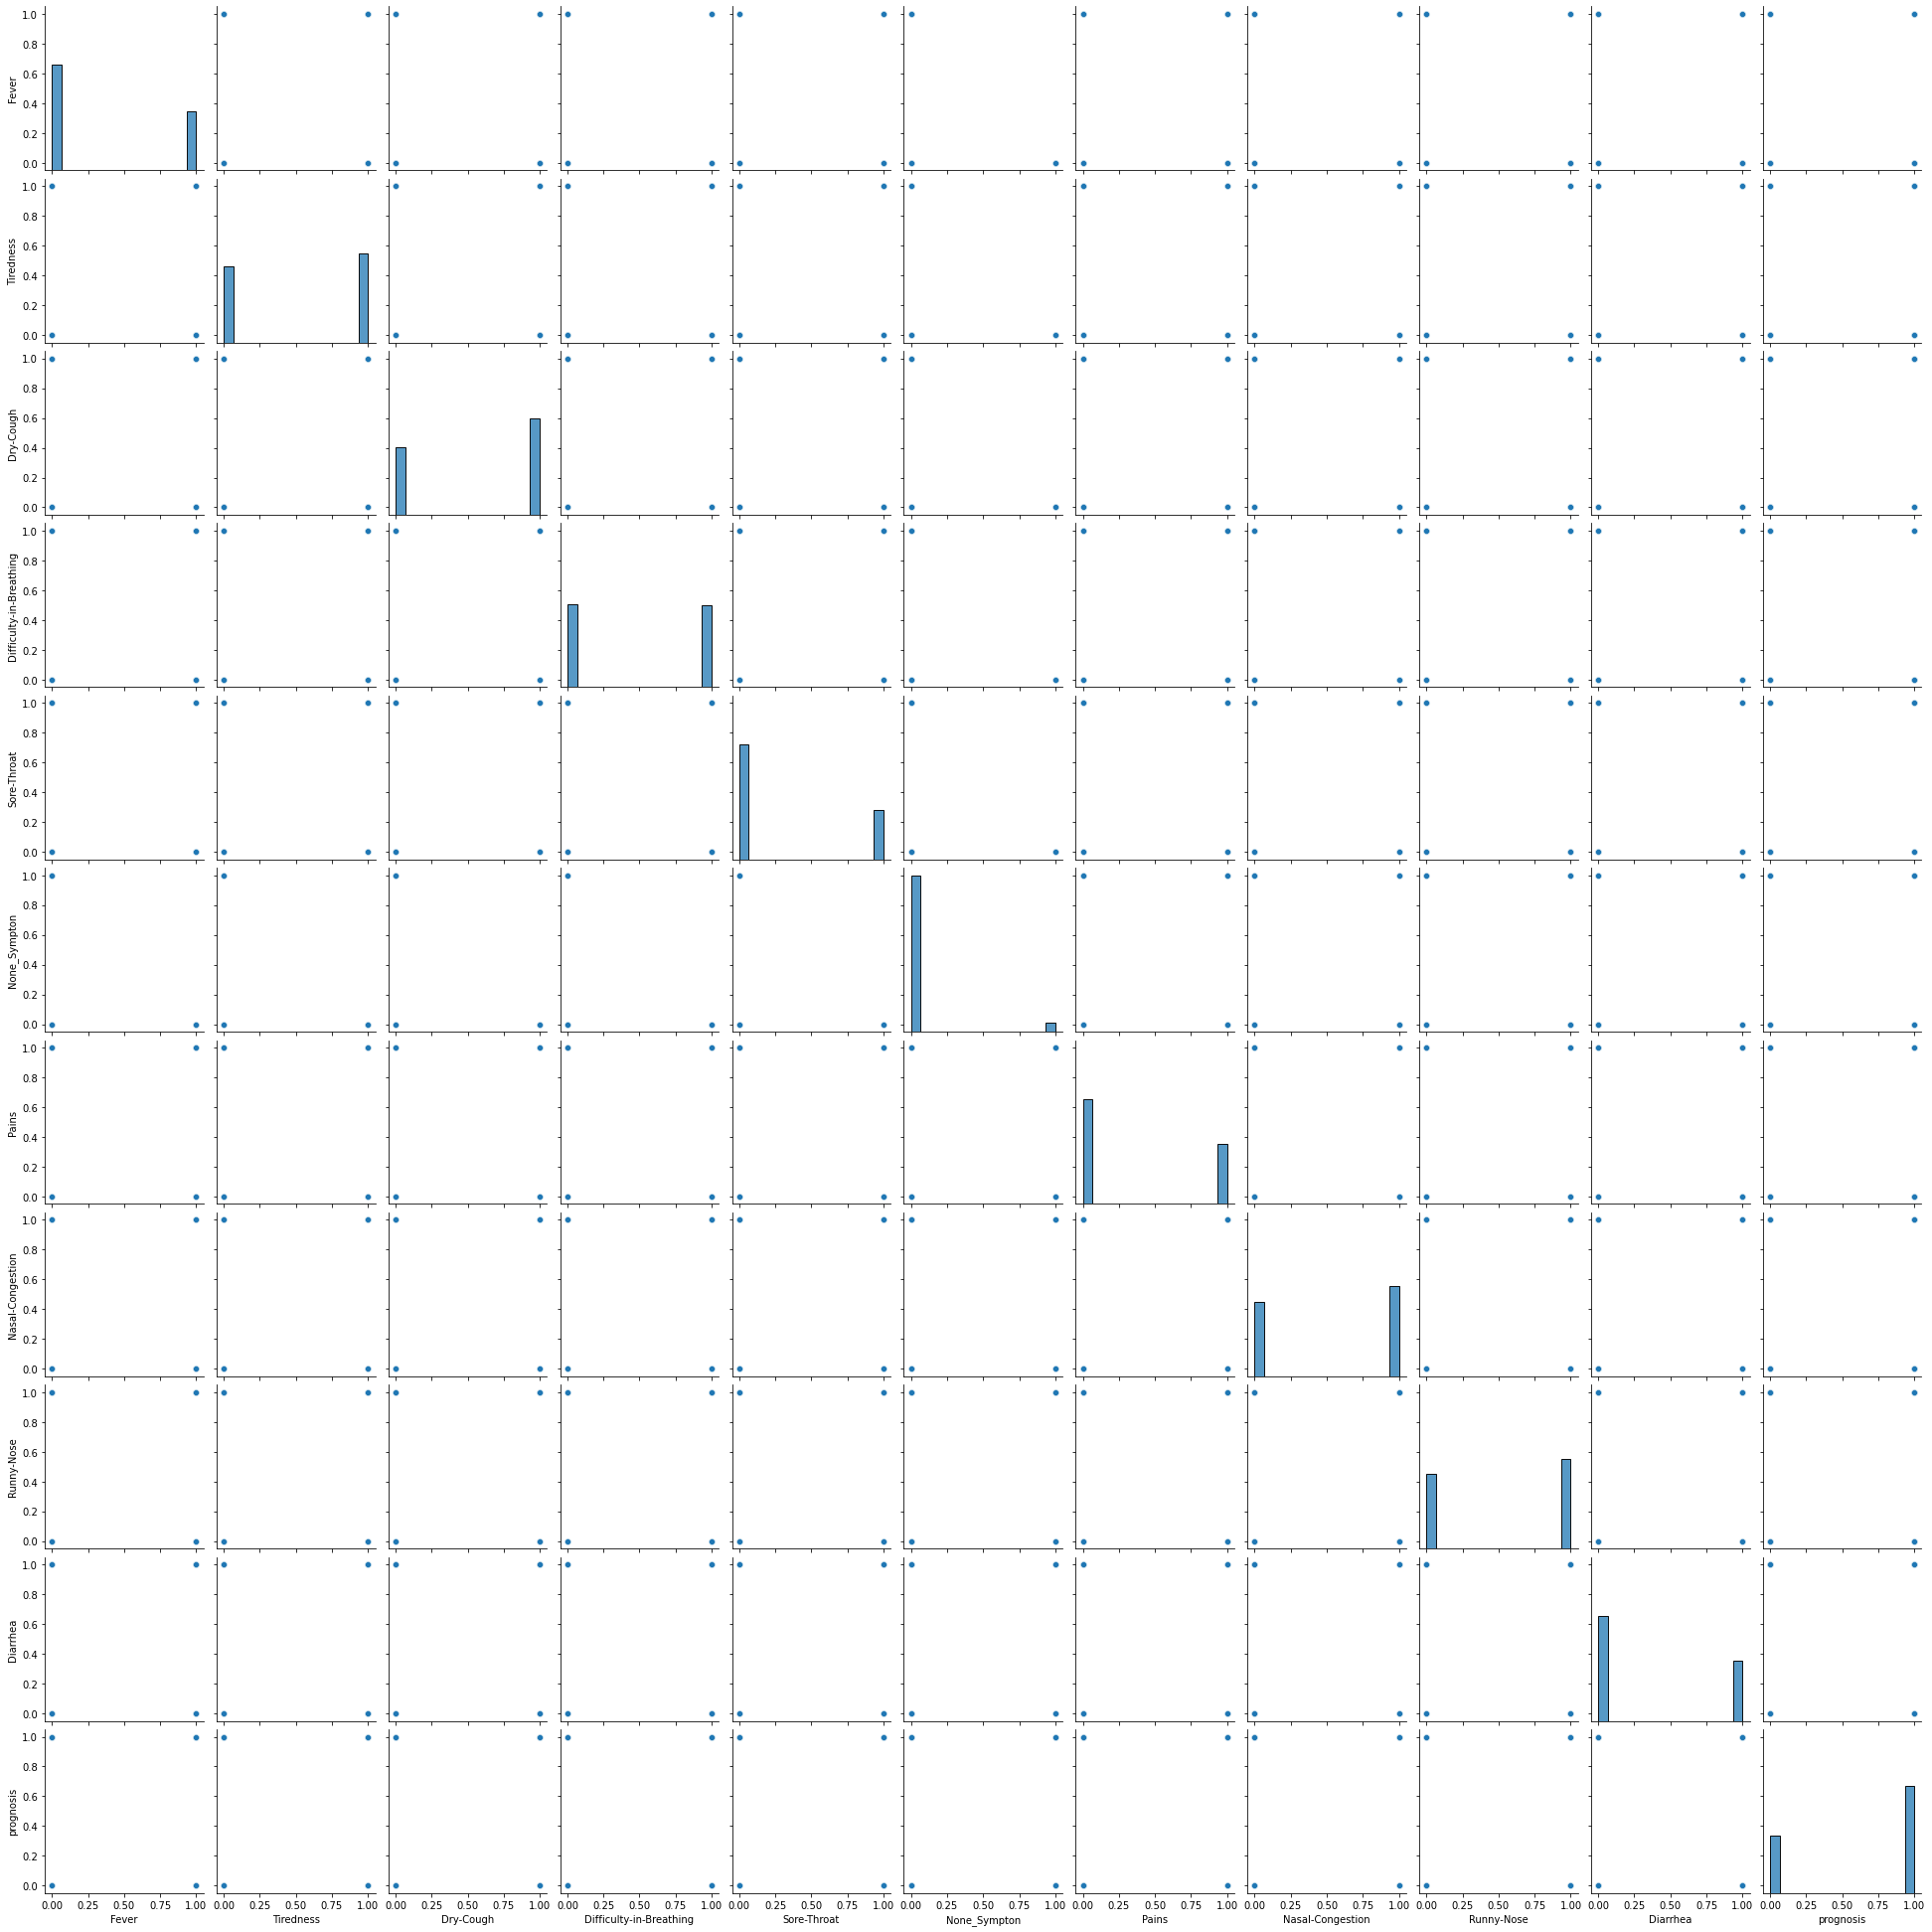

In [12]:
sns.pairplot(tr)

In [13]:
X=tr.iloc[:,:-1]
Y=tr.iloc[:,-1]
sm=SMOTE(random_state=10)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,stratify=Y,test_size=0.2)
X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)
print(sum(Y_train_res==1))
print(sum(Y_train_res==0))

6630
6630


Accuracy: 0.5107970160973695
              precision    recall  f1-score   support

           0       0.37      0.57      0.45       889
           1       0.68      0.48      0.56      1658

    accuracy                           0.51      2547
   macro avg       0.52      0.53      0.50      2547
weighted avg       0.57      0.51      0.52      2547



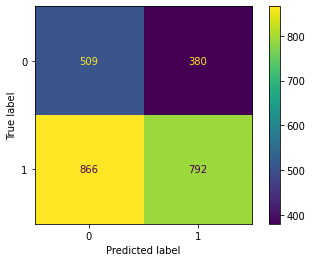

In [14]:
model1=LogisticRegression()
model1.fit(X_train_res,Y_train_res)
Y_pred1=model1.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred1))
print(classification_report(Y_test,Y_pred1))
plot_confusion_matrix(model1,X_test,Y_test)

Accuracy: 0.6034550451511582
              precision    recall  f1-score   support

           0       0.32      0.12      0.17       889
           1       0.65      0.86      0.74      1658

    accuracy                           0.60      2547
   macro avg       0.48      0.49      0.46      2547
weighted avg       0.53      0.60      0.54      2547



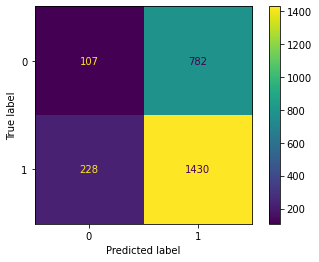

In [24]:
model2=KNeighborsClassifier(n_neighbors=15)
model2.fit(X_train_res,Y_train_res)
Y_pred2=model2.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))
plot_confusion_matrix(model2,X_test,Y_test)

Accuracy: 0.48998822143698467
              precision    recall  f1-score   support

           0       0.35      0.56      0.43       889
           1       0.66      0.45      0.54      1658

    accuracy                           0.49      2547
   macro avg       0.51      0.51      0.48      2547
weighted avg       0.55      0.49      0.50      2547



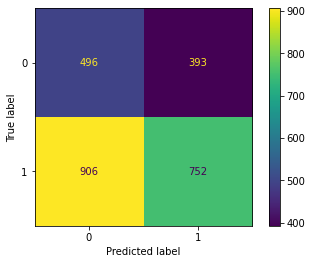

In [16]:
model3=DecisionTreeClassifier()
model3.fit(X_train_res,Y_train_res)
Y_pred3=model3.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred3))
print(classification_report(Y_test,Y_pred3))
plot_confusion_matrix(model3,X_test,Y_test)

Accuracy: 0.49744797801334906
              precision    recall  f1-score   support

           0       0.35      0.53      0.43       889
           1       0.66      0.48      0.55      1658

    accuracy                           0.50      2547
   macro avg       0.51      0.51      0.49      2547
weighted avg       0.55      0.50      0.51      2547



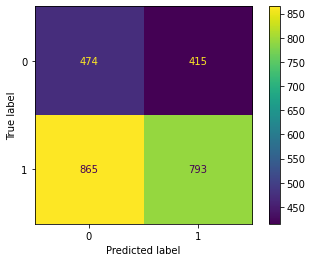

In [17]:
model4=RandomForestClassifier(n_estimators=2000)
model4.fit(X_train_res,Y_train_res)
Y_pred4=model4.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred4))
print(classification_report(Y_test,Y_pred4))
plot_confusion_matrix(model4,X_test,Y_test)

Accuracy: 0.5371024734982333
              precision    recall  f1-score   support

           0       0.36      0.43      0.39       889
           1       0.66      0.59      0.63      1658

    accuracy                           0.54      2547
   macro avg       0.51      0.51      0.51      2547
weighted avg       0.56      0.54      0.54      2547



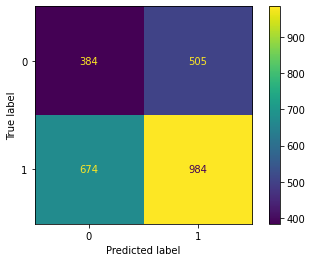

In [18]:
model5=GaussianNB()
model5.fit(X_train_res,Y_train_res)
Y_pred5=model5.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred5))
print(classification_report(Y_test,Y_pred5))
plot_confusion_matrix(model5,X_test,Y_test)

Accuracy: 0.5378877110325874
              precision    recall  f1-score   support

           0       0.37      0.46      0.41       889
           1       0.67      0.58      0.62      1658

    accuracy                           0.54      2547
   macro avg       0.52      0.52      0.52      2547
weighted avg       0.56      0.54      0.55      2547



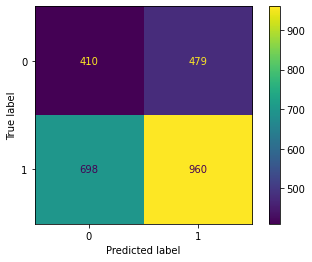

In [19]:
model6=MultinomialNB()
model6.fit(X_train_res,Y_train_res)
Y_pred6=model6.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred6))
print(classification_report(Y_test,Y_pred6))
plot_confusion_matrix(model6,X_test,Y_test)